In [64]:
#import libraries
import pandas as pd
pd.set_option("display.max_columns", None)
import warnings as w    
w.filterwarnings('ignore') #prevents future warning error
import matplotlib.pyplot as plt
import calendar
import pmdarima as pm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from prophet import Prophet
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
#read the original csv
df=pd.read_csv("owid-covid-data.csv")

In [3]:
#date column to date time
df['date'] =  pd.to_datetime(df['date'])

In [4]:
#getting cases sum by day
df_by_day = df.groupby(['date','location'])['new_cases'].sum()
df_by_day=pd.DataFrame(df_by_day)
df_by_day.reset_index(inplace=True)

In [5]:
#filter worldwide
df_by_day_world = df_by_day.loc[df_by_day['location'] == 'World']

In [6]:
#filter cases date
plot_cases=df_by_day.filter(['new_cases','date'])

In [7]:
plot_cases.set_index('date',inplace=True)

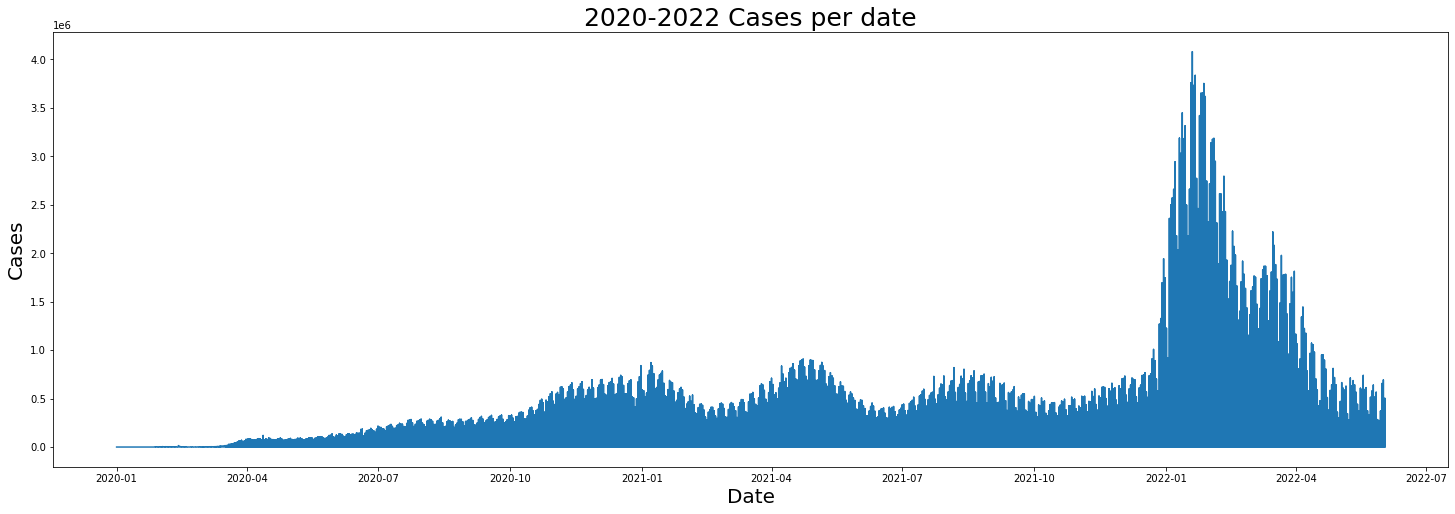

In [120]:
#plot the total cases per day
plt.figure(figsize=(25,8))
plt.plot(plot_cases)
plt.title('2020-2022 Cases per date',fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.show()

# First attempt using Prophet and original worldwide data 

In [9]:
prophetdf=df_by_day_world.filter(['new_cases','date'])
prophetdf.columns=['y','ds']

In [10]:
prophetdf

,y,ds
86,0.0,2020-01-22
107,100.0,2020-01-23
130,287.0,2020-01-24
155,493.0,2020-01-25
181,683.0,2020-01-26
...,...,...
190212,272829.0,2022-05-29
190442,371486.0,2022-05-30
190672,655340.0,2022-05-31
190902,692180.0,2022-06-01


In [11]:
model=Prophet(daily_seasonality=True)
model2=model.fit(prophetdf)
future=model.make_future_dataframe(periods=365,freq="D")
forecast=model.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-179289.4,37127.0,801486.8,-179289.4,-179289.4,607641.7,607641.7,607641.7,-724750.0,-724750.0,-724750.0,78294.8,78294.8,78294.8,1254096.9,1254096.9,1254096.9,0.0,0.0,0.0,428352.2
1,2020-01-23,-171686.0,68796.9,765229.1,-171686.0,-171686.0,602359.8,602359.8,602359.8,-724750.0,-724750.0,-724750.0,79066.4,79066.4,79066.4,1248043.4,1248043.4,1248043.4,0.0,0.0,0.0,430673.7
2,2020-01-24,-164082.6,45693.9,764450.6,-164082.6,-164082.6,580527.5,580527.5,580527.5,-724750.0,-724750.0,-724750.0,67350.4,67350.4,67350.4,1237927.1,1237927.1,1237927.1,0.0,0.0,0.0,416444.8
3,2020-01-25,-156479.2,-66142.5,633114.0,-156479.2,-156479.2,438627.2,438627.2,438627.2,-724750.0,-724750.0,-724750.0,-60697.7,-60697.7,-60697.7,1224074.9,1224074.9,1224074.9,0.0,0.0,0.0,282148.0
4,2020-01-26,-148875.8,-181278.8,526051.7,-148875.8,-148875.8,331044.7,331044.7,331044.7,-724750.0,-724750.0,-724750.0,-151043.3,-151043.3,-151043.3,1206838.1,1206838.1,1206838.1,0.0,0.0,0.0,182168.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2023-05-29,-500897.3,-3583837.6,698214.7,-2739389.0,1530714.4,-775695.1,-775695.1,-775695.1,-724750.0,-724750.0,-724750.0,-45850.2,-45850.2,-45850.2,-5094.9,-5094.9,-5094.9,0.0,0.0,0.0,-1276592.4
1224,2023-05-30,-505859.2,-3459046.8,831463.4,-2753844.1,1528482.4,-702020.1,-702020.1,-702020.1,-724750.0,-724750.0,-724750.0,32879.7,32879.7,32879.7,-10149.8,-10149.8,-10149.8,0.0,0.0,0.0,-1207879.3
1225,2023-05-31,-510821.0,-3453981.3,873912.1,-2773973.2,1524563.6,-661683.3,-661683.3,-661683.3,-724750.0,-724750.0,-724750.0,78294.8,78294.8,78294.8,-15228.1,-15228.1,-15228.1,0.0,0.0,0.0,-1172504.4
1226,2023-06-01,-515782.9,-3457891.2,891811.2,-2793142.9,1528909.6,-666076.1,-666076.1,-666076.1,-724750.0,-724750.0,-724750.0,79066.4,79066.4,79066.4,-20392.4,-20392.4,-20392.4,0.0,0.0,0.0,-1181859.0


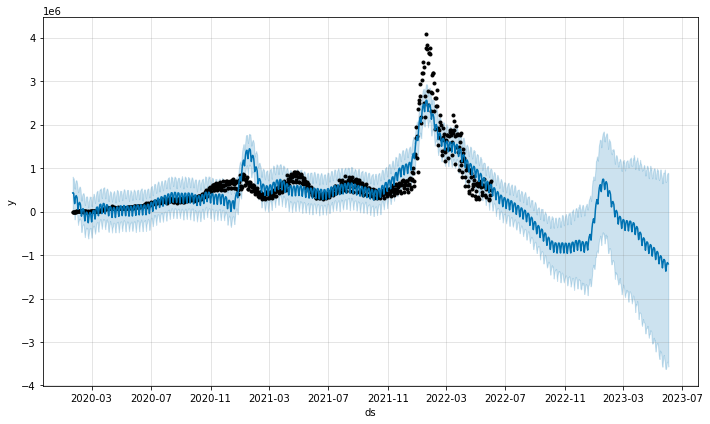

In [13]:
plot=model.plot(forecast)

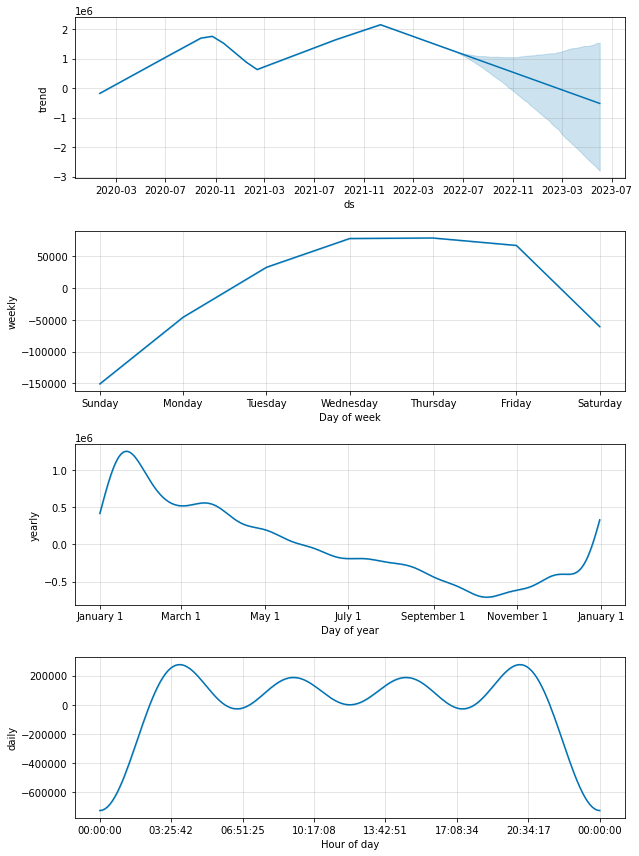

In [14]:
plot2=model.plot_components(forecast)

# Second attempt filtering specific dates (2021) using prophet / two years prediction

In [121]:
prophetdf = df_by_day_world.loc[df_by_day_world['date'] >= "2021-01-01" ]
prophetdf = prophetdf.loc[df_by_day_world['date'] <= "2021-12-01" ]
prophetdf=prophetdf.filter(['new_cases','date'])
plot=prophetdf.copy()
prophetdf.columns=['y','ds']

In [122]:
prophetdf

,y,ds
68356,588664.0,2021-01-01
68584,581373.0,2021-01-02
68812,520359.0,2021-01-03
69040,556398.0,2021-01-04
69268,741261.0,2021-01-05
...,...,...
146782,483925.0,2021-11-27
147022,432043.0,2021-11-28
147262,631973.0,2021-11-29
147502,600026.0,2021-11-30


In [123]:
plot.set_index('date',inplace=True)

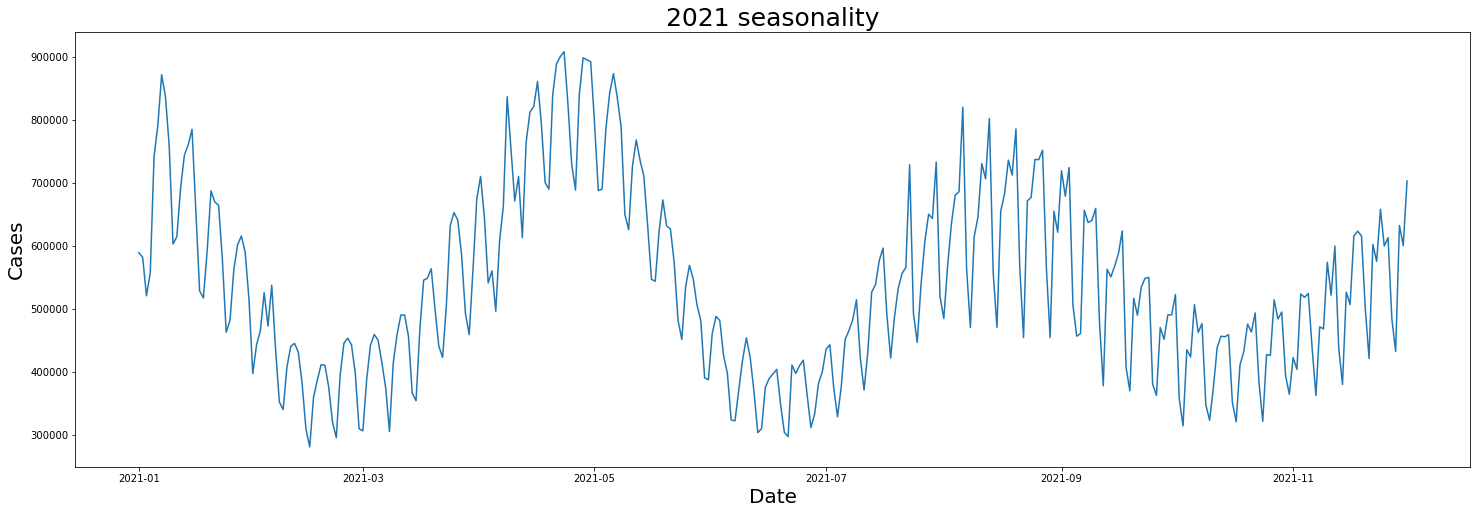

In [124]:
#plot seasonality
plt.figure(figsize=(25,8))
plt.plot(plot)
plt.title('2021 seasonality',fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.show()


In [125]:
model=Prophet(daily_seasonality=True,yearly_seasonality=True)
model2=model.fit(prophetdf)
future=model.make_future_dataframe(periods=730,freq="D")
forecast=model.predict(future)


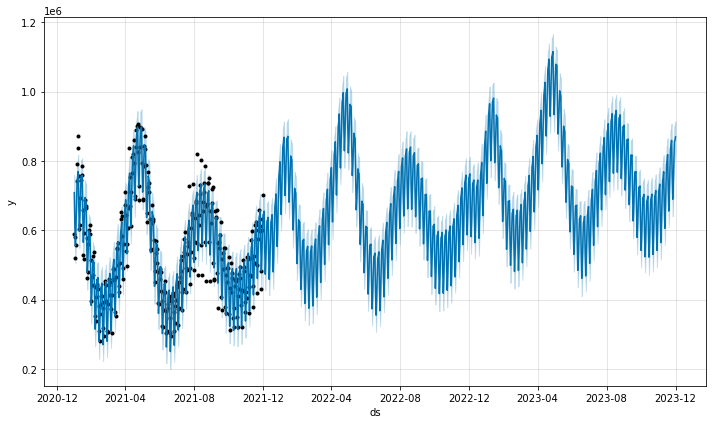

In [131]:
plot=model2.plot(forecast)

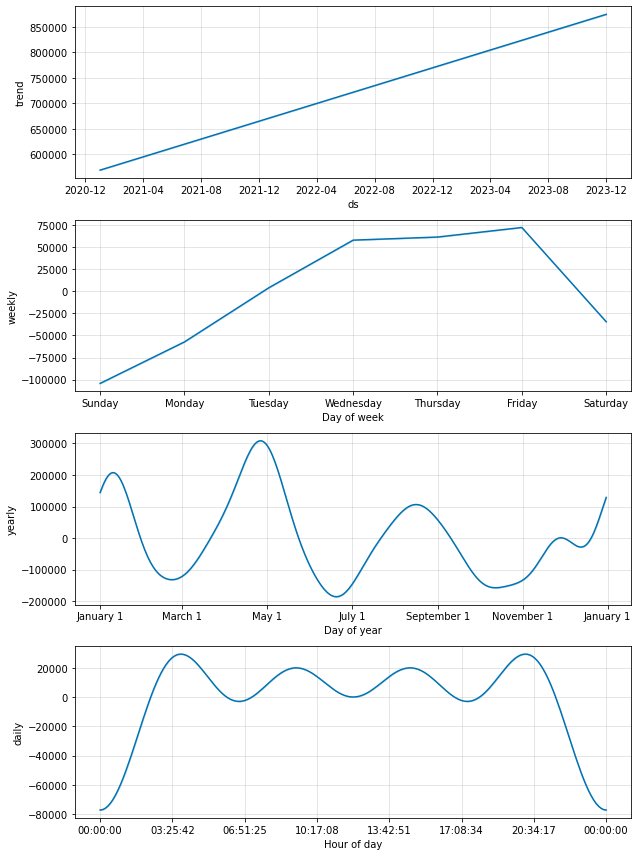

In [127]:
fig2 = model2.plot_components(forecast)

# Third attempt using arima (approx two past months prediction)

In [79]:
arimadf=df_by_day_world.copy()

In [80]:
arimadf.drop('location',inplace=True,axis=1)

In [81]:
arimadf=arimadf.set_index('date')

In [82]:
arimadf

,new_cases
date,
2020-01-22,0.0
2020-01-23,100.0
2020-01-24,287.0
2020-01-25,493.0
2020-01-26,683.0
...,...
2022-05-29,272829.0
2022-05-30,371486.0
2022-05-31,655340.0


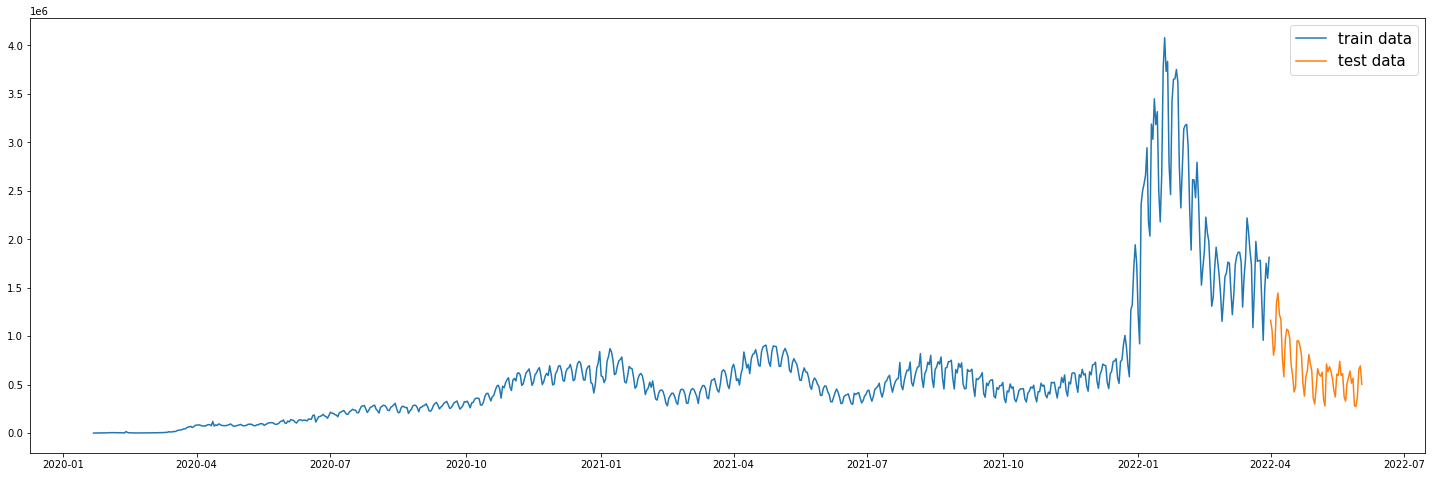

In [87]:
timeseries = arimadf['new_cases'].copy()
#splitting manually train and test size(90%-10%)
train_ts = timeseries[0:800]
test_ts = timeseries[800:]

#plot
plt.figure(figsize=(25,8))
plt.plot(train_ts,label='train data')
plt.plot(test_ts,label='test data')
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [88]:
#fit model
ar = pm.arima.ARIMA(order=(24,0,0))
ar.fit(train_ts)

ARIMA(order=(24, 0, 0))

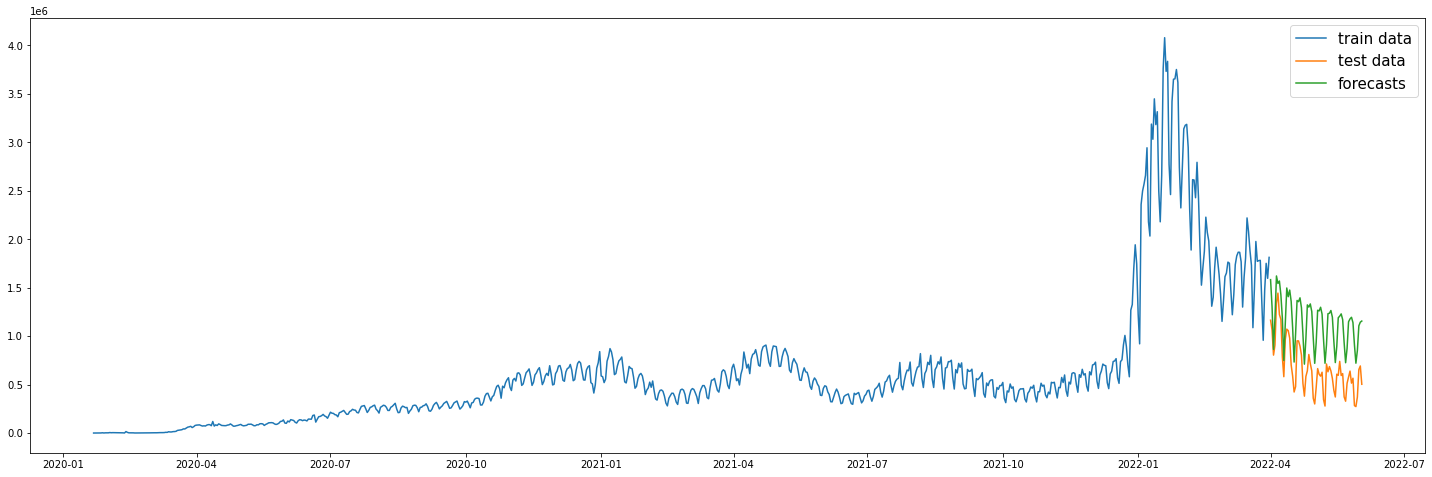

In [90]:
#plot forecasts
y_pred = pd.DataFrame(ar.predict(n_periods=63), index=test_ts.index, columns=['pred'])
plt.figure(figsize=(25,8))
plt.plot(train_ts, label='train data')
plt.plot(test_ts, label='test data')
plt.plot(y_pred, label='forecasts')
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [73]:
#print mae,mse
print(f'mean absolute error: {round(mean_absolute_error(test_ts, y_pred), 2)} \n')
print(f'mean squared error: {round(mean_squared_error(test_ts, y_pred), 2)} \n')

mean absolute error: 465939.76 

mean squared error: 240342885221.59 



# Fourth attempt using arima (test on 2021 )

In [91]:
arimadf = df_by_day_world.loc[df_by_day_world['date'] >= "2021-01-01" ]
arimadf = arimadf.loc[arimadf['date'] <= "2021-12-01" ]
arimadf=arimadf.filter(['new_cases','date'])
arimadf.set_index('date',inplace=True)

In [92]:
arimadf.shape

(335, 1)

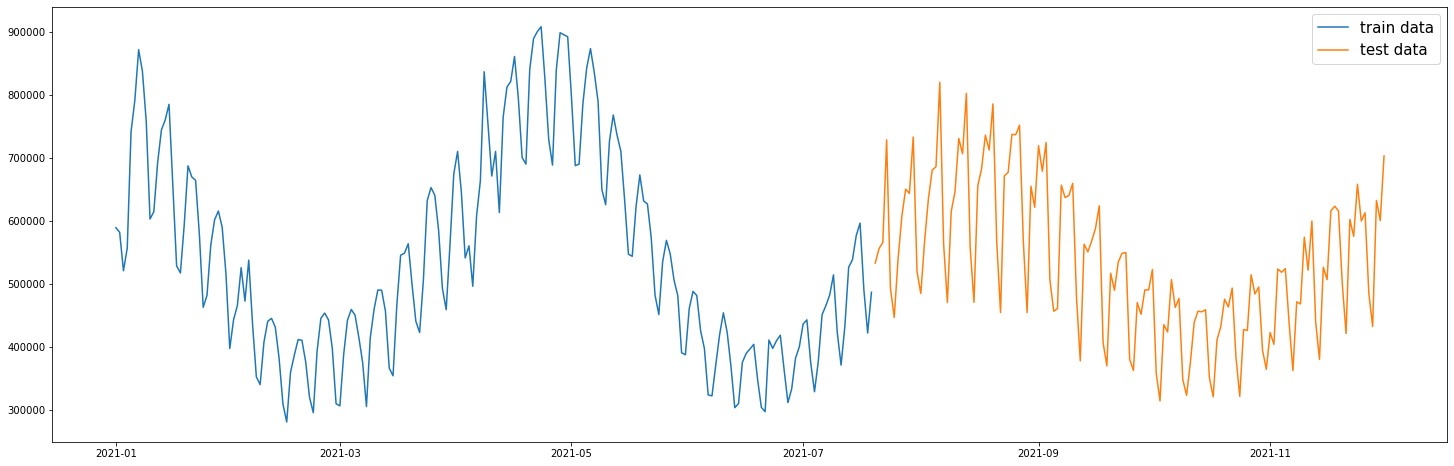

In [93]:
#split 40% test size
timeseries = arimadf['new_cases'].copy()
train_ts = timeseries[0:200]
test_ts = timeseries[200:]

plt.figure(figsize=(25,8))
plt.plot(train_ts, label='train data')
plt.plot(test_ts, label='test data')
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [94]:
ar = pm.arima.ARIMA(order=(24,0,0))
ar.fit(train_ts)

ARIMA(order=(24, 0, 0))

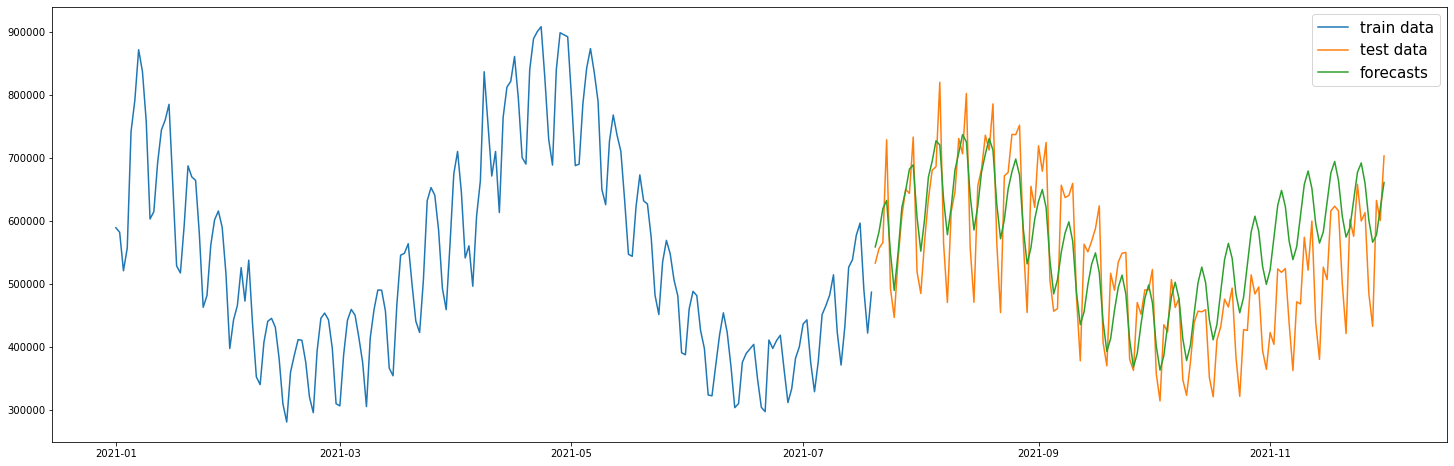

In [95]:
#forecasts
y_pred = pd.DataFrame(ar.predict(n_periods=135), index=test_ts.index, columns=['pred'])
plt.figure(figsize=(25,8))
plt.plot(train_ts, label='train data')
plt.plot(test_ts, label='test data')
plt.plot(y_pred, label='forecasts')
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [96]:
#print mae,mse
print(f'mean absolute error: {round(mean_absolute_error(test_ts, y_pred), 2)} \n')
print(f'mean squared error: {round(mean_squared_error(test_ts, y_pred), 2)} \n')

mean absolute error: 64128.36 

mean squared error: 5851773852.43 



# Fifth Attempt using neuralprophet on 2021 dates

In [97]:
from neuralprophet import NeuralProphet

In [99]:
neuraldf = df_by_day_world.loc[df_by_day_world['date'] >= "2021-01-01" ]
neuraldf = neuraldf.loc[neuraldf['date'] <= "2021-12-01" ]
neuraldf=neuraldf.filter(['new_cases','date'])
neuraldf.columns=['y','ds']

In [100]:
neuraldf

,y,ds
68356,588664.0,2021-01-01
68584,581373.0,2021-01-02
68812,520359.0,2021-01-03
69040,556398.0,2021-01-04
69268,741261.0,2021-01-05
...,...,...
146782,483925.0,2021-11-27
147022,432043.0,2021-11-28
147262,631973.0,2021-11-29
147502,600026.0,2021-11-30


In [101]:
m=NeuralProphet(epochs=1000)

In [103]:
m.fit(neuraldf,freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.701% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.701% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True

  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.44E-01, min: 1.53E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.44E-01, min: 1.53E+00


  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.98E-01, min: 5.13E-01
INFO:NP.utils_torch:lr-range-test results: steep: 2.98E-01, min: 5.13E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.62E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.62E-01
Epoch[1000/1000]: 100%|█| 1000/1000 [00:18<00:00, 52.76it/s, SmoothL1Loss=0.00363, MAE=3.62e+4, RMSE=4.47e+4, RegLoss=0


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.6,562171.7,710133.5,0.0
1,0.6,531263.5,689724.2,0.0
2,0.5,502190.4,665890.6,0.0
3,0.5,473603.8,636237.0,0.0
4,0.5,447400.6,617080.5,0.0
...,...,...,...,...
995,0.0,36189.0,45193.9,0.0
996,0.0,36188.5,45196.4,0.0
997,0.0,36188.1,45580.9,0.0
998,0.0,36187.2,44814.8,0.0


In [117]:
future=m.make_future_dataframe(neuraldf,periods=550)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.701% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.701% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


In [118]:
forecast=m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.818% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.818% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.818% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.818% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


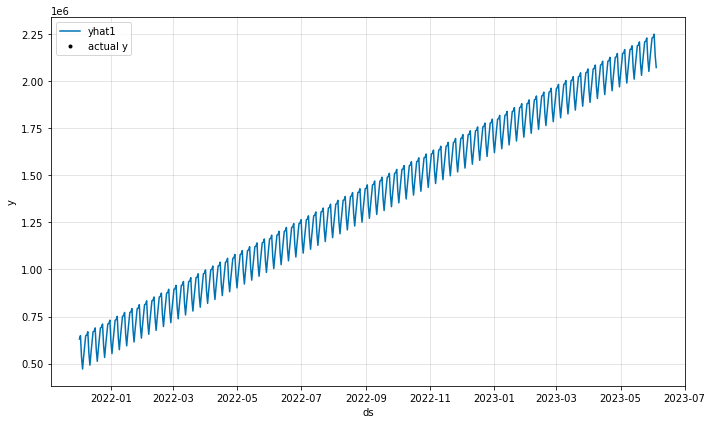

In [119]:
plot=m.plot(forecast)